In [5]:
import csv
import os

with open(os.path.join('Table results single.csv'),'r') as File:
    reader = csv.reader(File, delimiter='\t', quotechar=',',
                        quoting=csv.QUOTE_MINIMAL)
    row = []
    for row_read in reader:
        row.append(row_read) # Store each row
        
row_clear = row[1:] # Clear header
row_csv = []

print(row_clear)

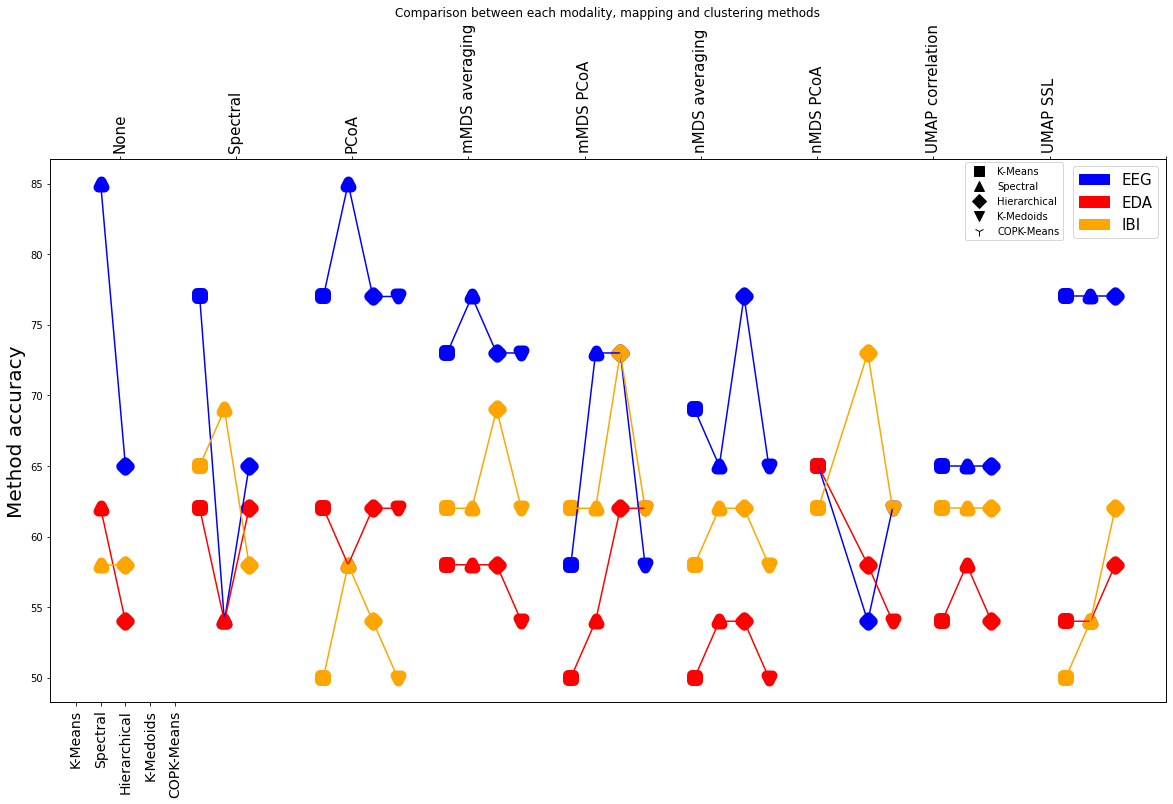

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Read table
results = np.genfromtxt(os.path.join('Table results single.csv'),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)

# Single modality results
single = results[2:,1:4]
#print(single)

# Multiview
#print(results[2:,4:8])

# Plot only results from working methods
markerList = ['s','^','D','v','1']
colorList = ['blue','red','orange']
clusteringList = ['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means']
fig, ax = plt.subplots(figsize=(20, 10))

for mod in range(3):
    for i in range(9):
        x = []
        y = []
        for j in range(5):
            if (single[i*5+j,mod] > 0):
                x.append(i*5+j)
                y.append(single[i*5+j,mod])
                plt.scatter(x[-1],y[-1],marker=markerList[j],color=colorList[mod],linewidth=10)
        plt.plot(x,y,color=colorList[mod])

# Clustering labels
#plt.xticks(np.arange(0,9*10))
#ax.set_xticklabels(9*['K-Means','Spectral','Hierarchical','K-Medoids','COPK-Means'], rotation=90)
plt.xticks(np.arange(0,5),size=14)
ax.set_xticklabels(clusteringList, rotation=90)

# Mapping labels
ax2 = ax.twiny()
ax2.xaxis.set_label_position("bottom")
plt.xticks(np.linspace(0,9*5,10)+3,size=15)
ax2.set_xticklabels(['None','Spectral','PCoA','mMDS averaging','mMDS PCoA','nMDS averaging','nMDS PCoA','UMAP correlation','UMAP SSL'], rotation=90)

# Add legend + title
import matplotlib.patches as mpatches

EEG = mpatches.Patch(color='blue', label='EEG')
EDA = mpatches.Patch(color='red', label='EDA')
IBI = mpatches.Patch(color='orange', label='IBI')
ax.set_ylabel('Method accuracy',size=20)

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

legendMarker = []
for i in range(5):
    legendMarker.append(mlines.Line2D([], [], color='black', marker=markerList[i], linestyle='None',
                              markersize=10, label=clusteringList[i]))

legend1 = plt.legend(handles=legendMarker,loc=(0.82,0.85))

plt.legend(handles=[EEG,EDA,IBI],prop={'size': 15})
plt.gca().add_artist(legend1)
plt.title("Comparison between each modality, mapping and clustering methods")
plt.savefig(os.path.join('figures','singleResults.png'),bbox_inches='tight')

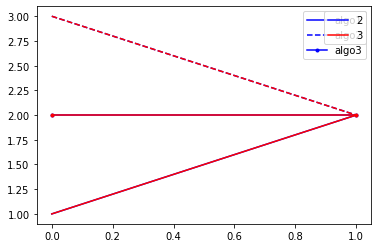

In [197]:
from matplotlib import pyplot

colors = ['b', 'r', 'g', 'c']
cc = itertools.cycle(colors)
plot_lines = []
parameters = [2,3]
for p in parameters:

    d1 = [1,2]
    d2 = [3,2]
    d3 = [2,2]

    c = next(cc)
    l1, = pyplot.plot(d1, '-', color=c)
    l2, = pyplot.plot(d2, '--', color=c)
    l3, = pyplot.plot(d3, '.-', color=c)

    plot_lines.append([l1, l2, l3])

legend1 = pyplot.legend(plot_lines[0], ["algo1", "algo2", "algo3"], loc=1)
pyplot.legend([l[0] for l in plot_lines], parameters)
pyplot.gca().add_artist(legend1)

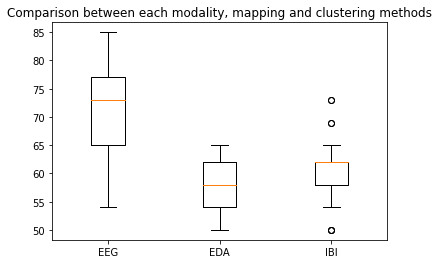

In [146]:

# Boxplot

i = 1
cleanedResultsEEG = results[~numpy.isnan(results[:,i]),i]
cleanedResultsEEG = cleanedResultsEEG[cleanedResultsEEG>0]

i = 2
cleanedResultsEDA = results[~numpy.isnan(results[:,i]),i]
cleanedResultsEDA = cleanedResultsEDA[cleanedResultsEDA>0]

i = 3
cleanedResultsIBI = results[~numpy.isnan(results[:,i]),i]
cleanedResultsIBI = cleanedResultsIBI[cleanedResultsIBI>0]

cleanedResults = []
for i in range(1,4):
    tmp = results[~numpy.isnan(results[:,i]),i]
    cleanedResults.append(tmp[tmp>0])

fig, ax = plt.subplots()
plt.boxplot(cleanedResults)
ax.set_xticklabels(['EEG','EDA','IBI'])
plt.title("Comparison between each modality, mapping and clustering methods")
plt.savefig(os.path.join('figures','singleBoxplots.png'),bbox_inches='tight')